# Tuning of Genetic Evaluators

Loading data for sigmoid center tuning

In [4]:
from data_processing_functions import *
from time import time
validation_measures = ["cost","precision","recall","f1","accuracy"]
corr_measure = "cost"
tuning_measure_prefix = "Sigmoid center"
names= ["GEIC","GEICS","GESC"]
csv_path_GEIC = "/home/jens/masterData/AlgorithmTuner/RANDGEIC/centerTest/2021-24-02-13-27-40-data.csv"
csv_path_GEICS = "/home/jens/masterData/AlgorithmTuner/RANDGEICS/centerTest/2021-24-02-13-31-01-data.csv"
csv_path_GEUICS = "/home/jens/masterData/AlgorithmTuner/RANDGEUICS/centerTest/2021-26-02-08-33-10-data.csv"
csv_path_GESC = "/home/jens/masterData/AlgorithmTuner/RANDGESC/centerTest/2021-24-02-13-34-02-data.csv"
paths = [csv_path_GEIC,csv_path_GEICS,csv_path_GESC]

## GEIC Correlation between cost and f1/precision as a function between Growth Rate

In [6]:
dfs = []
corr_dfs = []
tuning_measures=[]

for name,path in zip(names,paths):
    tuning_measures.append(tuning_measure:=name+"/"+tuning_measure_prefix)
    dfs.append(pd.read_csv(path, usecols = ["algName","objName","geName",tuning_measure]+validation_measures, dtype = {"algName":"category","objName":"category","geName":"category"}))
    corr_dfs.append(dfs[-1].groupby(["geName","objName",tuning_measure]).corrwith(dfs[-1][corr_measure]).reset_index())
    corr_dfs[-1].rename(columns={tuning_measure:tuning_measure_prefix},inplace=True)


In [ ]:
corr_df = pd.concat(corr_dfs).reset_index()

### F1 correlation

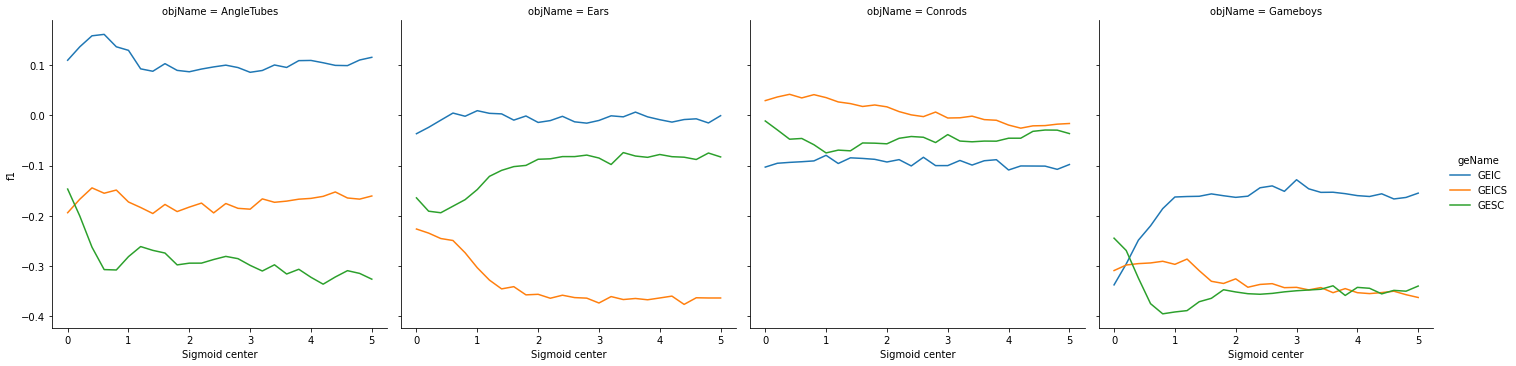

In [4]:
cost_corr_plot = sns.relplot(x=tuning_measure_prefix,y="f1",col="objName",hue="geName",data=corr_df,kind="line",facet_kws={'sharey': True, 'sharex': True}) 

## Precision correlation

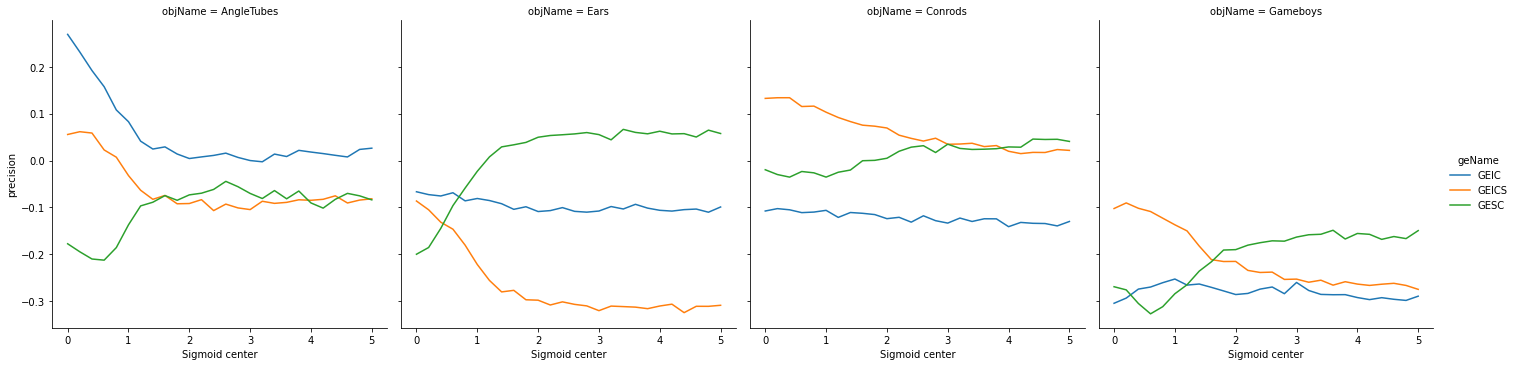

In [5]:
cost_corr_plot = sns.relplot(x=tuning_measure_prefix,y="precision",col="objName",hue="geName",data=corr_df,kind="line",facet_kws={'sharey': True, 'sharex': True}) 

In [6]:
print("Best Params for Correlation between cost and f1")
best_param_f1, best_idx_f1 = get_best_cost_corr_parameters(corr_df,"f1",tuning_measure_prefix)
print(best_param_f1)
print_best_cost_corr_parameters(best_param_f1,tuning_measure_prefix)

print("\nBest Params for Correlation between cost and pecision")
best_param_precision, best_idx_precision = get_best_cost_corr_parameters(corr_df,"precision",tuning_measure_prefix)
print(best_param_precision)
print_best_cost_corr_parameters(best_param_precision,tuning_measure_prefix)

Best Params for Correlation between cost and f1
        objName geName  Sigmoid center        f1
15   AngleTubes   GEIC             3.0  0.085966
26         Ears   GEIC             0.0 -0.036440
72      Conrods   GEIC             4.0 -0.108795
78     Gameboys   GEIC             0.0 -0.337804
111  AngleTubes  GEICS             1.4 -0.195528
152        Ears  GEICS             4.4 -0.376700
177     Conrods  GEICS             4.2 -0.025381
207    Gameboys  GEICS             5.0 -0.362946
229  AngleTubes   GESC             4.2 -0.336403
236        Ears   GESC             0.4 -0.194013
265     Conrods   GESC             1.0 -0.074739
290    Gameboys   GESC             0.8 -0.395511
AngleTubes,GEIC,Sigmoid center,3.0
Ears,GEIC,Sigmoid center,0.0
Conrods,GEIC,Sigmoid center,4.0
Gameboys,GEIC,Sigmoid center,0.0
AngleTubes,GEICS,Sigmoid center,1.4
Ears,GEICS,Sigmoid center,4.4
Conrods,GEICS,Sigmoid center,4.2
Gameboys,GEICS,Sigmoid center,5.0
AngleTubes,GESC,Sigmoid center,4.2
Ears,GESC,Sigmoid 